In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit import BasicAer, Aer
from qiskit import execute, assemble
from qiskit.visualization import array_to_latex
%matplotlib inline
# from qiskit.visualization import circuit_drawer

### Qasm_simulator

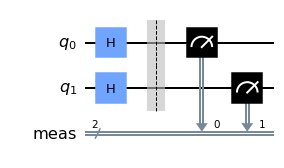

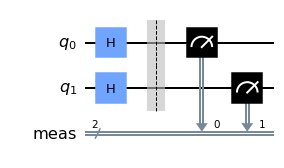

In [2]:
q = QuantumRegister(2, 'q')
qc = QuantumCircuit(q)
qc.h(0)
qc.h(1)
# qc.draw('mpl')
qc.measure_all()
qc.draw('mpl')

In [3]:
backend_qasm = BasicAer.get_backend('qasm_simulator')
result_qasm = execute(qc, backend_qasm).result()
count = result_qasm.get_counts()
print(count)

{'10': 265, '00': 256, '01': 247, '11': 256}


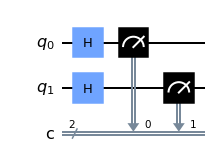

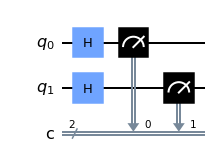

In [4]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)
qc.h(0)
qc.h(1)
qc.measure([0,1],[0,1])

qc.draw('mpl')

In [5]:
backend_qasm = BasicAer.get_backend('qasm_simulator')
result_qasm = execute(qc, backend_qasm).result()
count = result_qasm.get_counts()
print(count)

{'10': 261, '00': 276, '01': 237, '11': 250}


In [6]:
# array_to_latex(state, prefix="\\text{Statevector} = ")

### State Vector

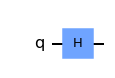

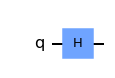

In [7]:
qcx = QuantumCircuit(1)
qcx.h(0)
# qcx.measure_all()
qcx.draw('mpl')

In [8]:
backend_state = BasicAer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result_state = execute(qcx,backend_state).result() # Do the simulation, returning the state vector
state = result_state.get_statevector()
print(state)
# plot_bloch_multivector(job.get_statevector()) # Display the output state vector

[0.70710678+0.j 0.70710678+0.j]


In [9]:
array_to_latex(state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

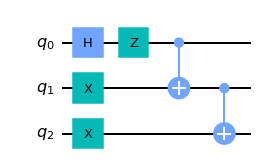

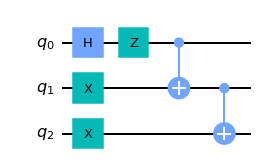

In [10]:
qc= QuantumCircuit(3)
qc.h(0)
qc.z(0)
qc.x(1)
qc.cx(0,1)
qc.x(2)
qc.cx(1,2)
qc.draw('mpl')


In [11]:
backend_sv = BasicAer.get_backend('statevector_simulator') 
job = execute(qc, backend_sv,shots=1024)
result = job.result()
sv_ev = result.get_statevector(qc)
print(sv_ev)

[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678-8.65956056e-17j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j]


In [12]:
array_to_latex(sv_ev, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

### Unitary Simulator

In [13]:
q = QuantumRegister(2,'q')
qc = QuantumCircuit(q)
qc.cx(0,1)
backend_unitary = BasicAer.get_backend('unitary_simulator') 
result_unitary = execute(qc,backend_unitary).result().get_unitary(decimals=3)
print(result_unitary)
display(array_to_latex(result_unitary, prefix="\\text{Statevector} = "))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


<IPython.core.display.Latex object>

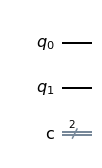

<IPython.core.display.Latex object>

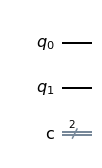

In [14]:
# from qiskit import qiskit, execute, QuantumCircuit, BasicAer
from qiskit.quantum_info import Statevector
# from qiskit.circuit.random import random_circuit

# Create a random circuit.
qc = QuantumCircuit(2,2)
display(qc.draw('mpl'))
sv = Statevector.from_label('1') # 00 corresponds to the number of qubits
ev = sv.evolve(qc)

# We can plot using either method!
# plot_state_city(ev)
ev.draw()
display(array_to_latex(ev, prefix="\\text{Statevector} = "))

In [33]:
q = QuantumRegister(2,'q')
qc = QuantumCircuit(q)
# qc.h(0)
qc.x(0)
# qc.h(1)
backend_unitary = BasicAer.get_backend('unitary_simulator') 
result_unitary = execute(qc,backend_unitary).result().get_unitary(decimals=3)
print(result_unitary)
display(array_to_latex(result_unitary, prefix="\\text{Statevector} = "))

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


<IPython.core.display.Latex object>

In [32]:
q = QuantumRegister(2,'q')
qc = QuantumCircuit(q)
qc.cx(0,1)
qc.cy(0,1)
backend_unitary = BasicAer.get_backend('unitary_simulator') 
result_unitary = execute(qc,backend_unitary).result().get_unitary(decimals=3)
print(result_unitary)
display(array_to_latex(result_unitary, prefix="\\text{Statevector} = "))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]]


<IPython.core.display.Latex object>

In [28]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.x(0)
# qc.cy(0,1)
backend_unitary = BasicAer.get_backend('unitary_simulator') 
result_unitary = execute(qc,backend_unitary).result().get_unitary(decimals=3)
print(result_unitary)
display(array_to_latex(result_unitary, prefix="\\text{Statevector} = "))

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


<IPython.core.display.Latex object>